# 파일 다운로드

In [140]:
import sys
from pandas import read_csv, pivot_table, melt, concat,merge
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from random import randint

In [2]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# origin1 = read_csv('C:/Users/kimjh/산대특_데이터분석 알고리즘 개발/megaIT_da/2차 프로젝트/시간대별 카드 이용금액 현황_제주데이터랩(180101-231031).csv')
# origin2 = read_csv('C:/Users/kimjh/산대특_데이터분석 알고리즘 개발/megaIT_da/2차 프로젝트/업종별성별외식업이용정보_제주데이터랩(180101-231031).csv')
origin = read_csv('../../파일/종현/업종별성별카드이용정보_제주데이터랩(180101-231031).csv', encoding='euc-kr')

In [4]:
origin.head()

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,201801,건강보조식품 소매업,기타외국,알수없음,65,78,101523250
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470
2,201801,건강보조식품 소매업,내국인,알수없음,1,1,396000
3,201801,건강보조식품 소매업,내국인,여성,200,218,32041740
4,201801,건강보조식품 소매업,동남아,알수없음,8,8,1550000


In [5]:
origin.tail()

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
20639,202310,휴양콘도 운영업,법인,알수없음,2084,4413,2208853529
20640,202310,휴양콘도 운영업,제주도민,남성,897,1118,64997332
20641,202310,휴양콘도 운영업,제주도민,알수없음,1,1,4000
20642,202310,휴양콘도 운영업,제주도민,여성,967,1169,86172869
20643,202310,휴양콘도 운영업,중국,알수없음,63,76,6297800


In [6]:
origin['이용자구분'].value_counts()

이용자구분
내국인     6376
제주도민    5616
법인      2795
중국      1878
기타외국    1865
일본      1113
동남아     1001
Name: count, dtype: int64

In [7]:
origin['업종명'].unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업',
       '기타 갬블링 및 베팅업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업',
       '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓',
       '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업',
       '일식 음식점업', '자동차 임대업', '전시 및 행사 대행업', '정기 항공 운송업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자, 햄버거, 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '택시 운송업',
       '기타음?식료품위주종합소매업'], dtype=object)

In [8]:
숙박 = ['여관업', '휴양콘도 운영업', '호텔업']
식비 = ['서양식 음식점업', '일식 음식점업','비알콜 음료점업', '피자, 햄버거, 샌드위치 및 유사 음식점업', 
      '기타 외국식 음식점업', '한식 음식점업', '중식 음식점업', '기타 주점업', '체인화 편의점','일반유흥 주점업', 
      '육류 소매업', '빵 및 과자류 소매업', '과실 및 채소 소매업', '기타음식료품위주종합소매업', '수산물 소매업']
교통 = ['내항 여객 운송업', '자동차 임대업', '정기 항공 운송업', '차량용 주유소 운영업', '차량용 가스 충전업', '택시 운송업']
레져 = ['그외 기타 분류안된 오락관련 서비스업', '기타 수상오락 서비스업', '골프장 운영업', '그외 기타 스포츠시설 운영업', 
      '스포츠 및 레크레이션 용품 임대업', '기타 갬블링 및 베팅업']
기념품 = ['면세점', '관광 민예품 및 선물용품 소매업', '화장품 및 방향제 소매업', '건강보조식품 소매업']
여행사업 = ['여행사업']
기타대형종합소매업 = ['기타 대형 종합 소매업']

In [9]:
# 범주형으로 변경
origin['이용자구분'] = origin['이용자구분'].astype('category')
origin['성별'] = origin['성별'].astype('category')
origin['업종명'] = origin['업종명'].astype('category')

In [10]:
# 복사본 생성
df = origin.copy()


In [41]:
# 조건 1) 제주도민을 제외한 전부는 여행객으로 설정
df = df.query('이용자구분 != "제주도민"')

# 조건 2) 2019년 01월 ~ 2019년 12월까지만 
df = df.query('연월 >= 201901 and 연월 <= 201912')

In [90]:
pivot = pivot_table(df,
                     index= '연월',
                     columns= '업종명',
                     values='이용자수',
                     aggfunc='sum')
pivot.reset_index(inplace=True)
pivot
pivot1 = pivot_table(df,
                     index= '연월',
                     columns= '업종명',
                     values='이용금액',
                     aggfunc='sum')
pivot1.reset_index(inplace=True)
pivot1



업종명,연월,건강보조식품 소매업,골프장 운영업,과실 및 채소 소매업,관광 민예품 및 선물용품 소매업,그외 기타 분류안된 오락관련 서비스업,그외 기타 스포츠시설 운영업,그외 기타 종합 소매업,기타 갬블링 및 베팅업,기타 대형 종합 소매업,...,중식 음식점업,차량용 가스 충전업,차량용 주유소 운영업,체인화 편의점,택시 운송업,"피자, 햄버거, 샌드위치 및 유사 음식점업",한식 음식점업,호텔업,화장품 및 방향제 소매업,휴양콘도 운영업
0,201901,641147800,2089604724,2755523885,733125550,5718500,41956100,2756365540,116667000,2797418370,...,796988480,591729510,7035527550,3644119499,0,687944335,19972847182,4576865545,489241608,2045214919
1,201902,549933331,2432240567,2144397856,631014035,6060000,38360900,1890212190,77500000,2311711700,...,708920360,545915845,6026532761,3166001855,162200,609101029,19666715714,4000757315,465671085,1733440222
2,201903,988439058,3368994889,2721586976,974093610,4220000,46447814,1393785690,124000000,2158138980,...,818091820,583267130,6925787790,3525177358,0,595537740,19843020056,3922956593,606575554,1909604912
3,201904,921024800,4424426024,2873068813,1244046346,5592000,66488900,1595869320,87700000,2137827990,...,826438420,470860463,7011718257,3773090893,250000,644974354,21276903351,4840746997,632517098,2511037389
4,201905,1023062000,4913429329,2574476953,1122388083,5622100,101428600,1678189070,119000000,2439710800,...,892838521,531863659,7923711073,4131082911,150000,752595309,21983821875,5572168231,564843211,2285283932
5,201906,1006686983,4699337201,2440501670,1079593211,7420650,58164300,1610058750,271500000,2310165670,...,901902842,451226276,7729463261,4316060324,1175000,748395052,22144810557,5268201078,516760710,2288909692
6,201907,1084976479,3362593501,1722408855,875206625,8977500,60151700,1507140690,221000000,2654720810,...,923236172,428870262,7623504734,4653688360,620000,822180323,21674530787,5425515732,565032030,3024142421
7,201908,910140678,4081666899,2204983546,976004180,14199650,83935500,2060353210,245900000,2983001450,...,1007244815,423420864,8624636869,5356270775,2300,925738803,25120465883,6130230966,535890999,3916744695
8,201909,1006878652,3047750703,2643226302,905409740,10647850,68207500,3345995620,325700000,2574338330,...,811783265,355670201,6947703811,4032144020,0,659918275,20970989478,4494709922,518131630,1969662603
9,201910,1164756158,5276361172,2967625714,1297414165,10332700,97526210,1729827560,178500000,2345233495,...,940501832,473011316,7906879390,4653880447,1634400,832601590,23123094062,5807042668,615158748,2714210705


In [100]:
m숙박 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 숙박, 
           value_name='이용객수' 
           )
m숙박
m숙박1 = melt(pivot1,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 숙박, 
           value_name='이용금액' 
           )
m숙박1
m숙박 = merge(m숙박,m숙박1)
m숙박

,연월,업종명,이용객수,이용금액
0,201901,여관업,30186,3929720126
1,201902,여관업,26244,3597272303
2,201903,여관업,28019,3773090329
3,201904,여관업,30002,4373802101
4,201905,여관업,34384,4730080505
5,201906,여관업,34663,4817441748
6,201907,여관업,35617,4474657881
7,201908,여관업,39987,5372305123
8,201909,여관업,27764,3636600057
9,201910,여관업,34808,4989435814


In [197]:

# ---------------------------------------
# 숙박업
# ---------------------------------------

pivot = pivot_table(df,
                     index= '연월',
                     columns= '업종명',
                     values='이용자수',
                     aggfunc='sum')
pivot.reset_index(inplace=True)
pivot1 = pivot_table(df,
                     index= '연월',
                     columns= '업종명',
                     values='이용금액',
                     aggfunc='sum')
pivot1.reset_index(inplace=True)

m숙박 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 숙박,    # 재배치하고자 하는 변수
           value_name='이용객수' 
           )
m숙박1 = melt(pivot1,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 숙박, 
           value_name='이용금액' 
           )
m숙박 = merge(m숙박,m숙박1)

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬

# ---------------------------------------
# 식비
# ---------------------------------------

m식비 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 식비,    # 재배치하고자 하는 변수
           value_name='이용객수' 
           )
m식비1 = melt(pivot1,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 식비, 
           value_name='이용금액' 
           )
m식비 = merge(m식비,m식비1)
# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬

# ---------------------------------------
# 교통
# ---------------------------------------


m교통 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 교통,    # 재배치하고자 하는 변수
           value_name='이용객수' 
           )
m교통1 = melt(pivot1,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 교통, 
           value_name='이용금액' 
           )
m교통 = merge(m교통,m교통1)
# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬

# ---------------------------------------
# 레져
# ---------------------------------------

m레져 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 레져,    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )
m레져1 = melt(pivot1,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 레져, 
           value_name='이용금액' 
           )
m레져 = merge(m레져,m레져1)

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬
# ---------------------------------------
# 기념품
# ---------------------------------------

m기념품 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 기념품,    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )
m기념품1 = melt(pivot1,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 기념품, 
           value_name='이용금액' 
           )
m기념품 = merge(m기념품,m기념품1)
# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬
# ---------------------------------------
# 여행사업
# ---------------------------------------

m여행사업 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 여행사업,    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )
m여행사업1 = melt(pivot1,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 여행사업, 
           value_name='이용금액' 
           )
m여행사업 = merge(m여행사업,m여행사업1)
# ---------------------------------------
# 기타대형종합소매업
# ---------------------------------------


m기타대형종합소매업 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 기타대형종합소매업,    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )
m기타대형종합소매업1 = melt(pivot1,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 기타대형종합소매업, 
           value_name='이용금액' 
           )
m기타대형종합소매업 = merge(m기타대형종합소매업,m기타대형종합소매업1)

In [189]:
A = [m숙박, m식비, m교통, m레져, m기념품, m여행사업, m기타대형종합소매업]
a = 0
for i in A:
    a = max(a,len(i)/12)
color = ['#3d00e0','#5300e8','#b794f6']

for i in range(15):
    r = randint(0, 255)      # red
    g = randint(0, 255)      # green
    b = randint(0, 255)      # blue    
    color.append('rgb(%d, %d, %d)' % (r, g, b))
color

['#3d00e0',
 '#5300e8',
 '#b794f6',
 'rgb(55, 63, 156)',
 'rgb(198, 24, 163)',
 'rgb(64, 106, 232)',
 'rgb(22, 117, 180)',
 'rgb(93, 191, 143)',
 'rgb(190, 225, 25)',
 'rgb(84, 150, 102)',
 'rgb(165, 165, 0)',
 'rgb(30, 163, 175)',
 'rgb(186, 247, 116)',
 'rgb(35, 130, 206)',
 'rgb(19, 0, 45)',
 'rgb(166, 111, 222)',
 'rgb(145, 77, 15)',
 'rgb(250, 182, 179)']

In [200]:
A = [m숙박, m식비, m교통, m레져, m기념품, m여행사업, m기타대형종합소매업]
for j in A:
    a = j['연월']
    for i,v in enumerate(a):
        a[i] = str(v)

C:\Users\hyk\AppData\Local\Temp\ipykernel_20272\3208386639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i] = str(v)
C:\Users\hyk\AppData\Local\Temp\ipykernel_20272\3208386639.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '201901' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  a[i] = str(v)
C:\Users\hyk\AppData\Local\Temp\ipykernel_20272\3208386639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i] = str(v)
C:\Users\hyk\AppData\Local\Temp\ipykernel_20272\3208386639.py:5: FutureWarning: Se

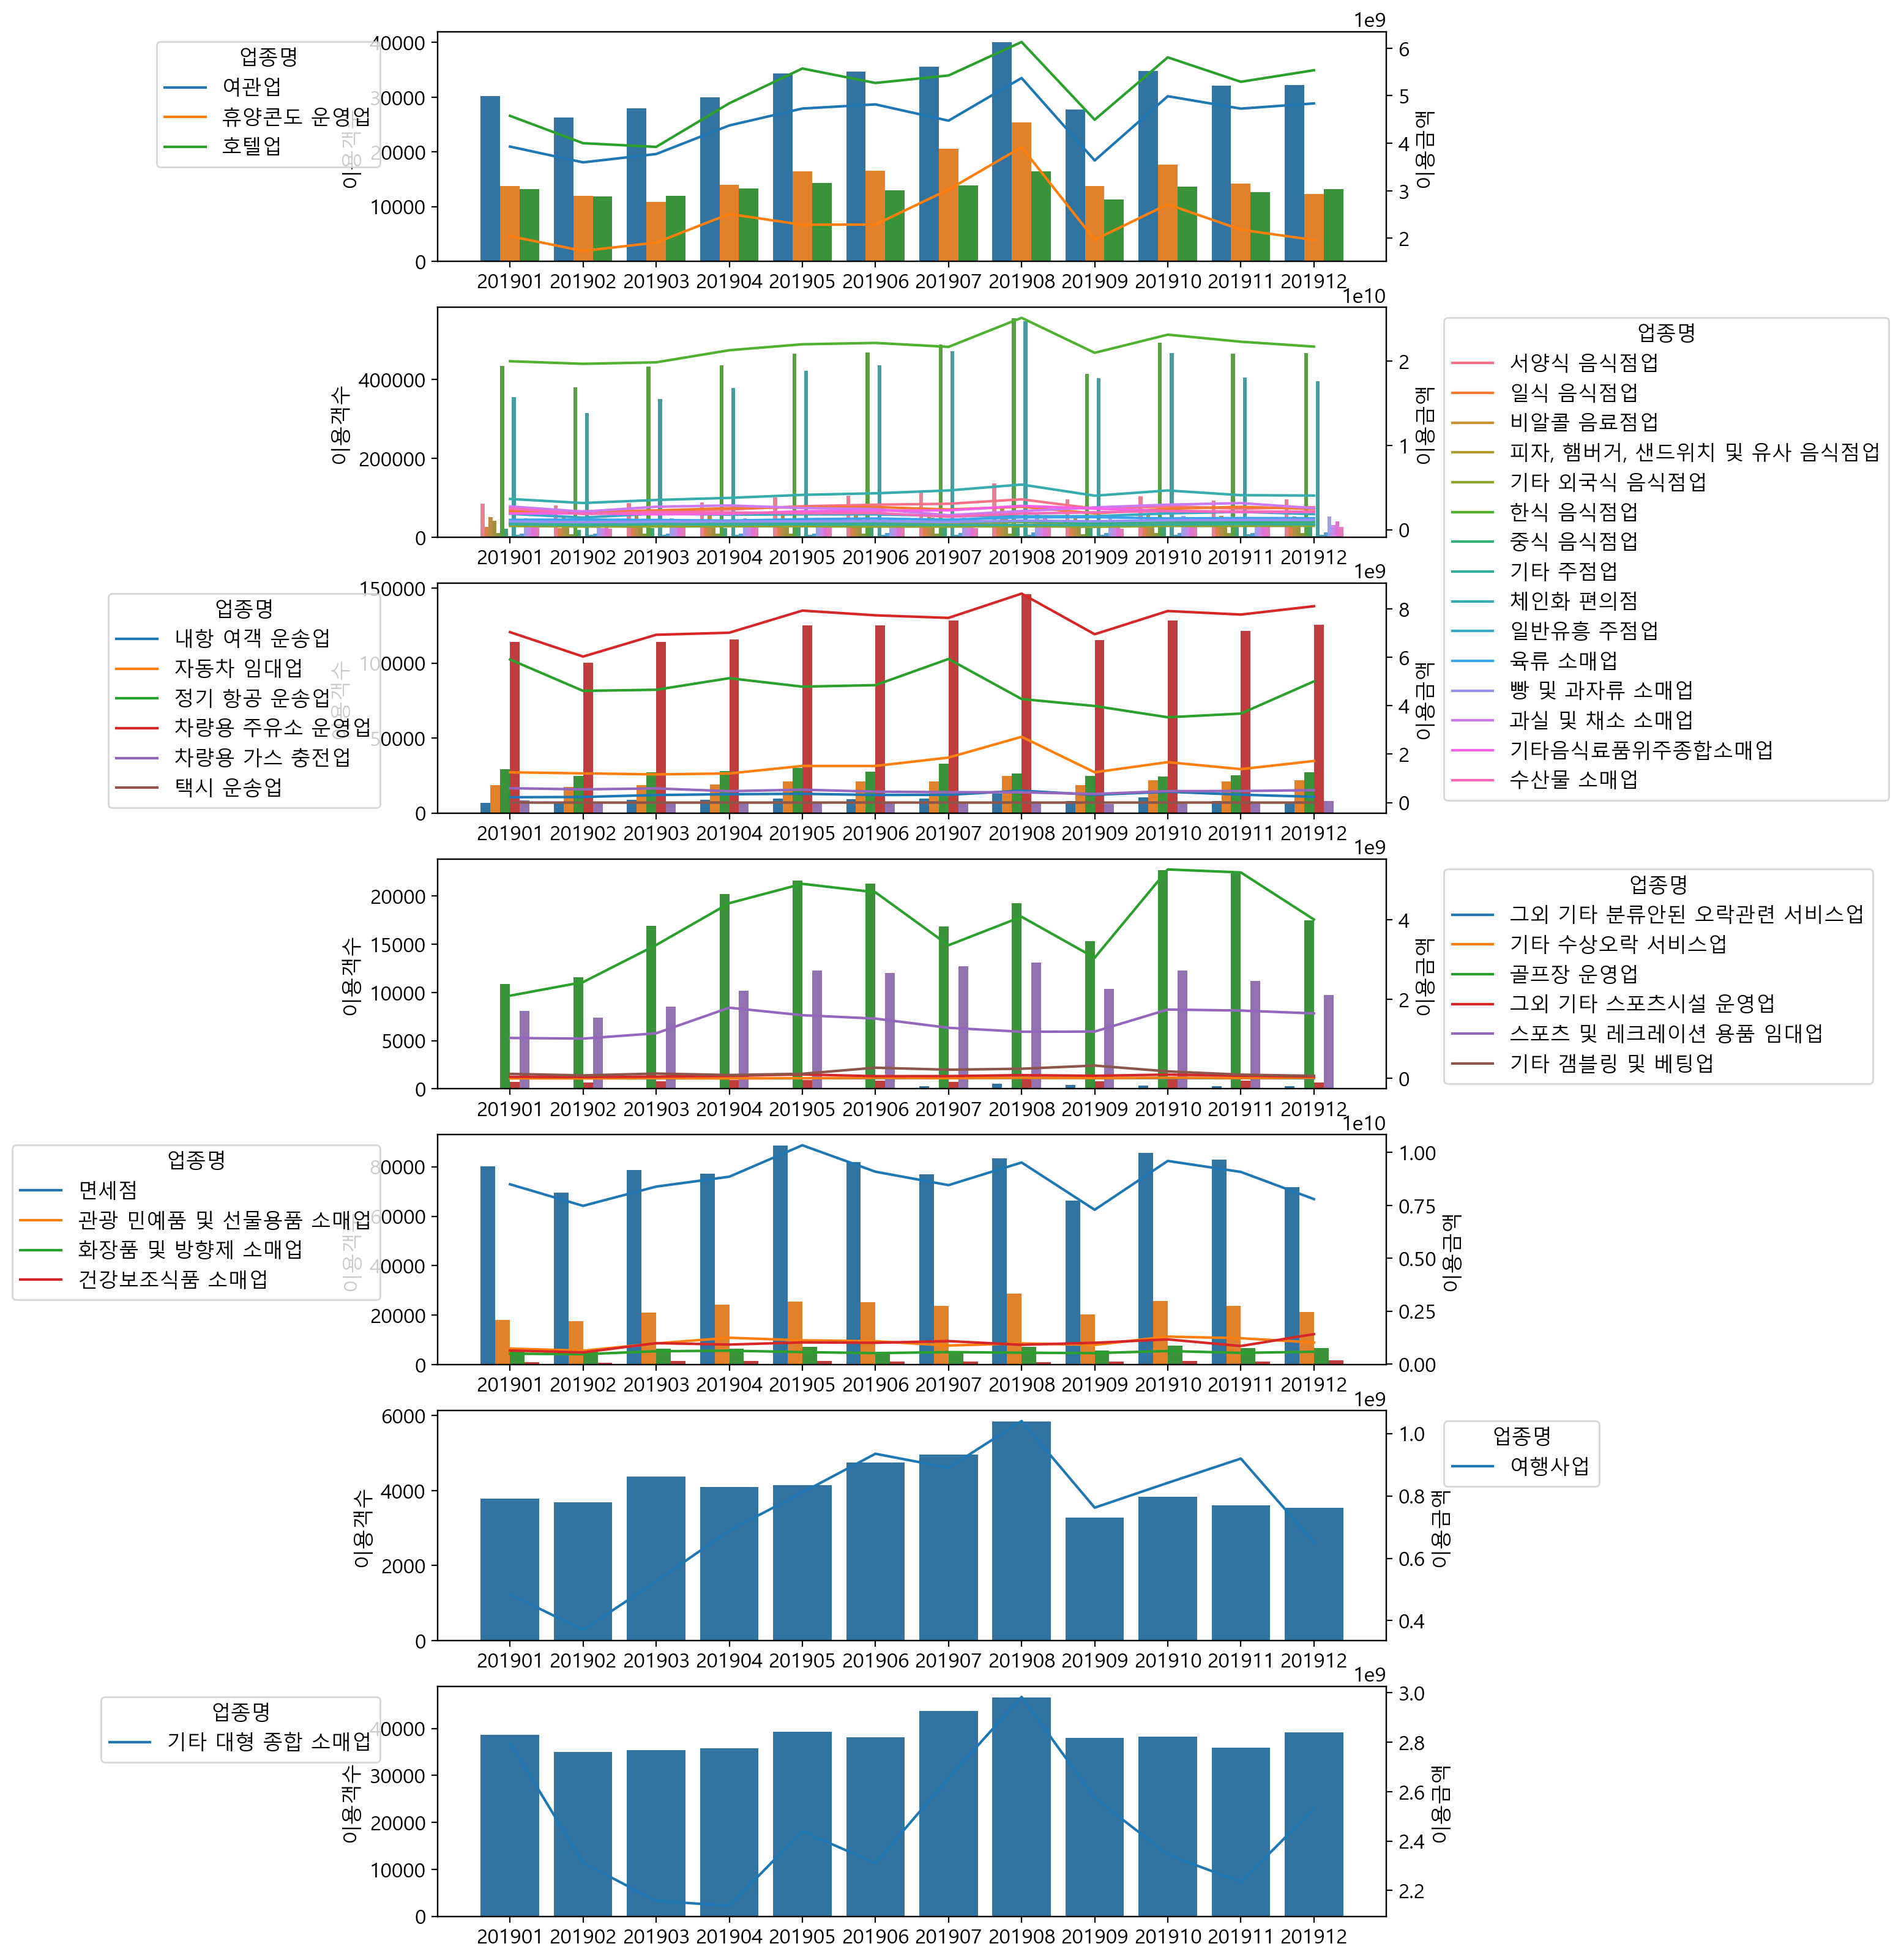

In [215]:
A = [m숙박, m식비, m교통, m레져, m기념품, m여행사업, m기타대형종합소매업]
fig, axes = plt.subplots(7,1,figsize=(10,20))
for i,v in enumerate(axes):
    a=v.twinx()
    sns.barplot(data=A[i], x='연월', y='이용객수', hue='업종명',ax=v,legend=False)
    v.set_xlabel('')
    if i%2:
        sns.move_legend(sns.lineplot(data=A[i], x='연월', y='이용금액', hue='업종명',ax=a), 'upper left', bbox_to_anchor=(1.05,1))
    else:
        sns.move_legend(sns.lineplot(data=A[i], x='연월', y='이용금액', hue='업종명',ax=a), 'upper right', bbox_to_anchor=(-.05,1))        
    a.set_xlabel('')



In [51]:
# 복사본 생성
# 조건 1) 제주도민을 제외한 전부는 여행객으로 설정
# 조건 2) 2019년 01월 ~ 2019년 12월까지만 
df1 = origin.copy().query('이용자구분 != "제주도민"').query('연월 >= 202001 and 연월 <= 202012')


# ---------------------------------------
# 숙박업
# ---------------------------------------
pivot = pivot_table(df1,
                     index= '연월',
                     columns= '업종명',
                     values='이용자수',
                     aggfunc='sum')
pivot.reset_index(inplace=True)

m숙박 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 숙박,    # 재배치하고자 하는 변수
           value_name='이용객수' 
           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬

# ---------------------------------------
# 식비
# ---------------------------------------

m식비 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 식비,    # 재배치하고자 하는 변수
           value_name='이용객수' 
           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬

# ---------------------------------------
# 교통
# ---------------------------------------


m교통 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 교통,    # 재배치하고자 하는 변수
           value_name='이용객수' 
           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬

# ---------------------------------------
# 레져
# ---------------------------------------

m레져 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 레져,    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬
# ---------------------------------------
# 기념품
# ---------------------------------------

m기념품 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 기념품,    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬
# ---------------------------------------
# 여행사업
# ---------------------------------------

m여행사업 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 여행사업,    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )

# ---------------------------------------
# 기타대형종합소매업
# ---------------------------------------


m기타대형종합소매업 = melt(pivot,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 기타대형종합소매업,    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )

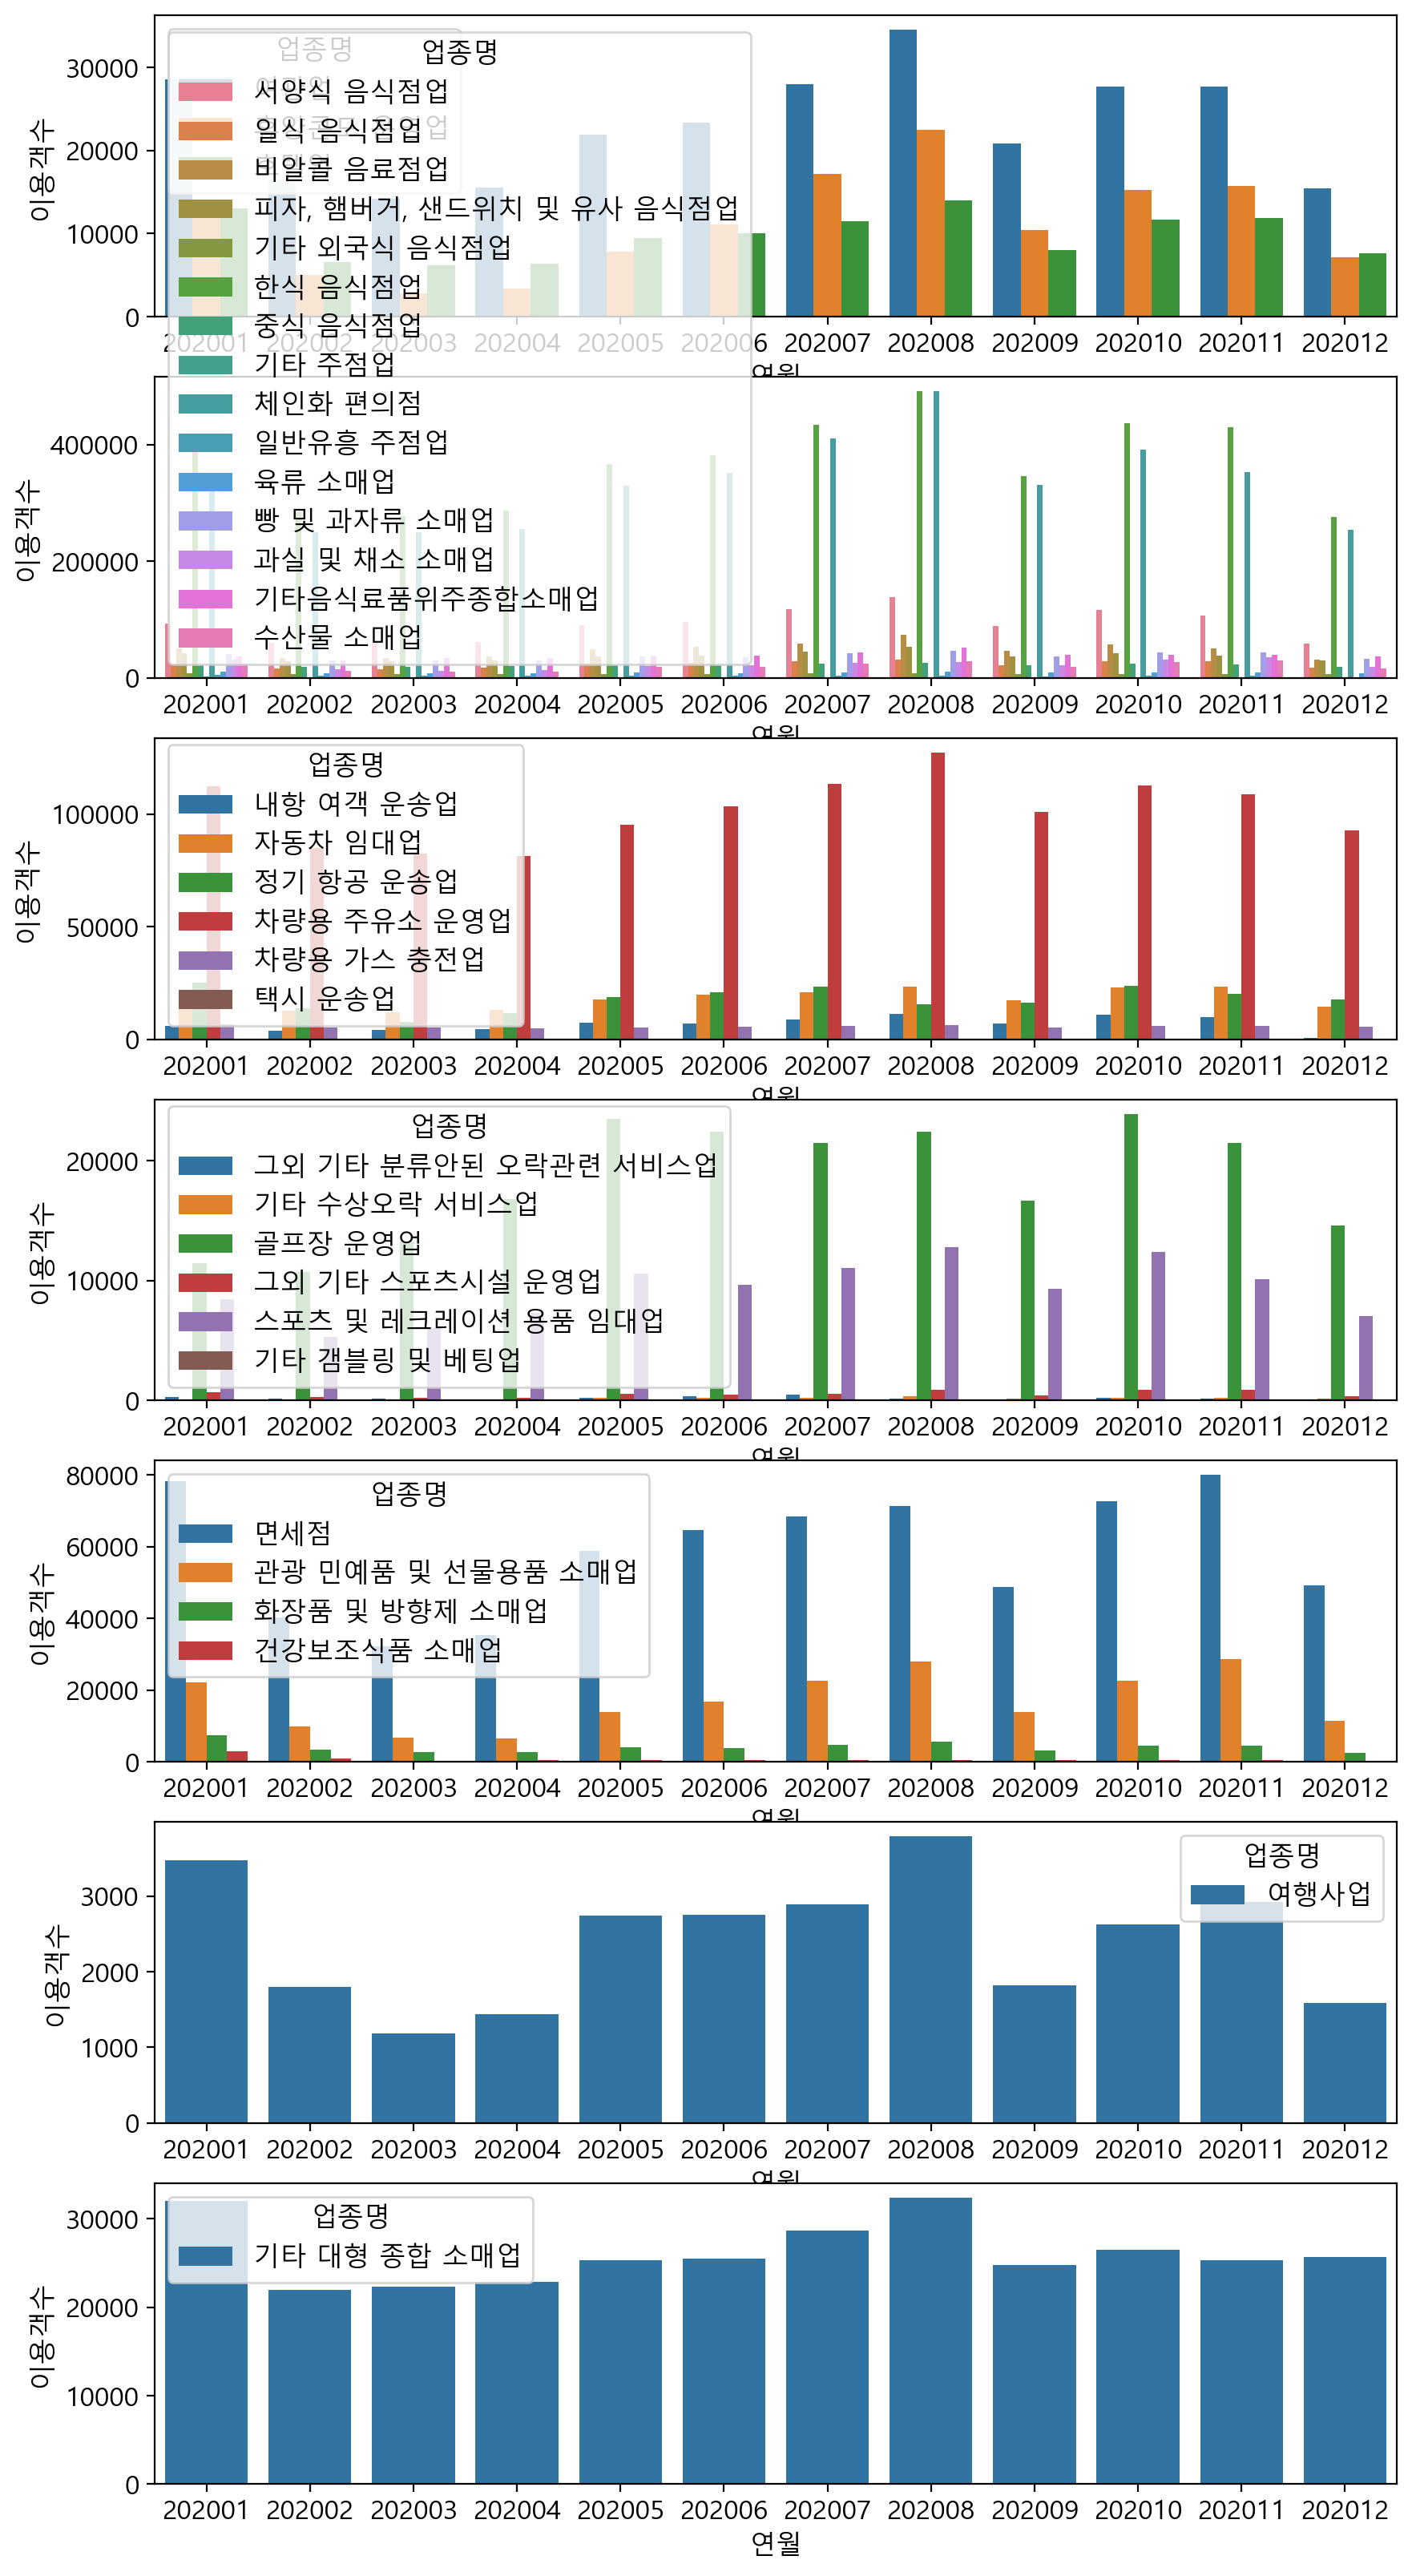

In [52]:
A = [m숙박, m식비, m교통, m레져, m기념품, m여행사업, m기타대형종합소매업]

fig, axes = plt.subplots(7,1,figsize=(10,20))
for i,v in enumerate(axes):
    sns.barplot(data=A[i], x='연월', y='이용객수', hue='업종명',ax=v)


In [ ]:
#증감률이랑 막대그래프로

In [ ]:
pivot1['휴양콘도 운영업']

연월
201801    13647
201802     9665
201803    11760
201804    14350
201805    15800
201806    15392
201807    14432
201808    20331
201809    13105
201810    13904
201811    11947
201812    10200
Name: 휴양콘도 운영업, dtype: int64

In [ ]:
tmp2=pivot1[['호텔업', '여관업', '휴양콘도 운영업']]
tmp2

업종명,호텔업,여관업,휴양콘도 운영업
연월,,,
201801,14690,40007,16411
201802,12676,31690,12035
201803,13482,37025,14187
201804,14003,41643,15975
201805,16621,42671,18382
201806,15485,45179,17571
201807,17089,47036,16772
201808,20038,50704,26289
201809,14660,38868,15590


In [ ]:
tmp2.reset_index(inplace=True)

In [ ]:
tmp2.set_index('index', inplace=True)

In [ ]:
tmp2['연월'] = tmp2['연월'].astype('category')

In [ ]:
mtmp = melt(tmp2,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= ['호텔업', '여관업', '휴양콘도 운영업'],    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬

In [ ]:
mtmp

,연월,업종명,value
0,201801,호텔업,14690
1,201802,호텔업,12676
2,201803,호텔업,13482
3,201804,호텔업,14003
4,201805,호텔업,16621
5,201806,호텔업,15485
6,201807,호텔업,17089
7,201808,호텔업,20038
8,201809,호텔업,14660
9,201810,호텔업,15812


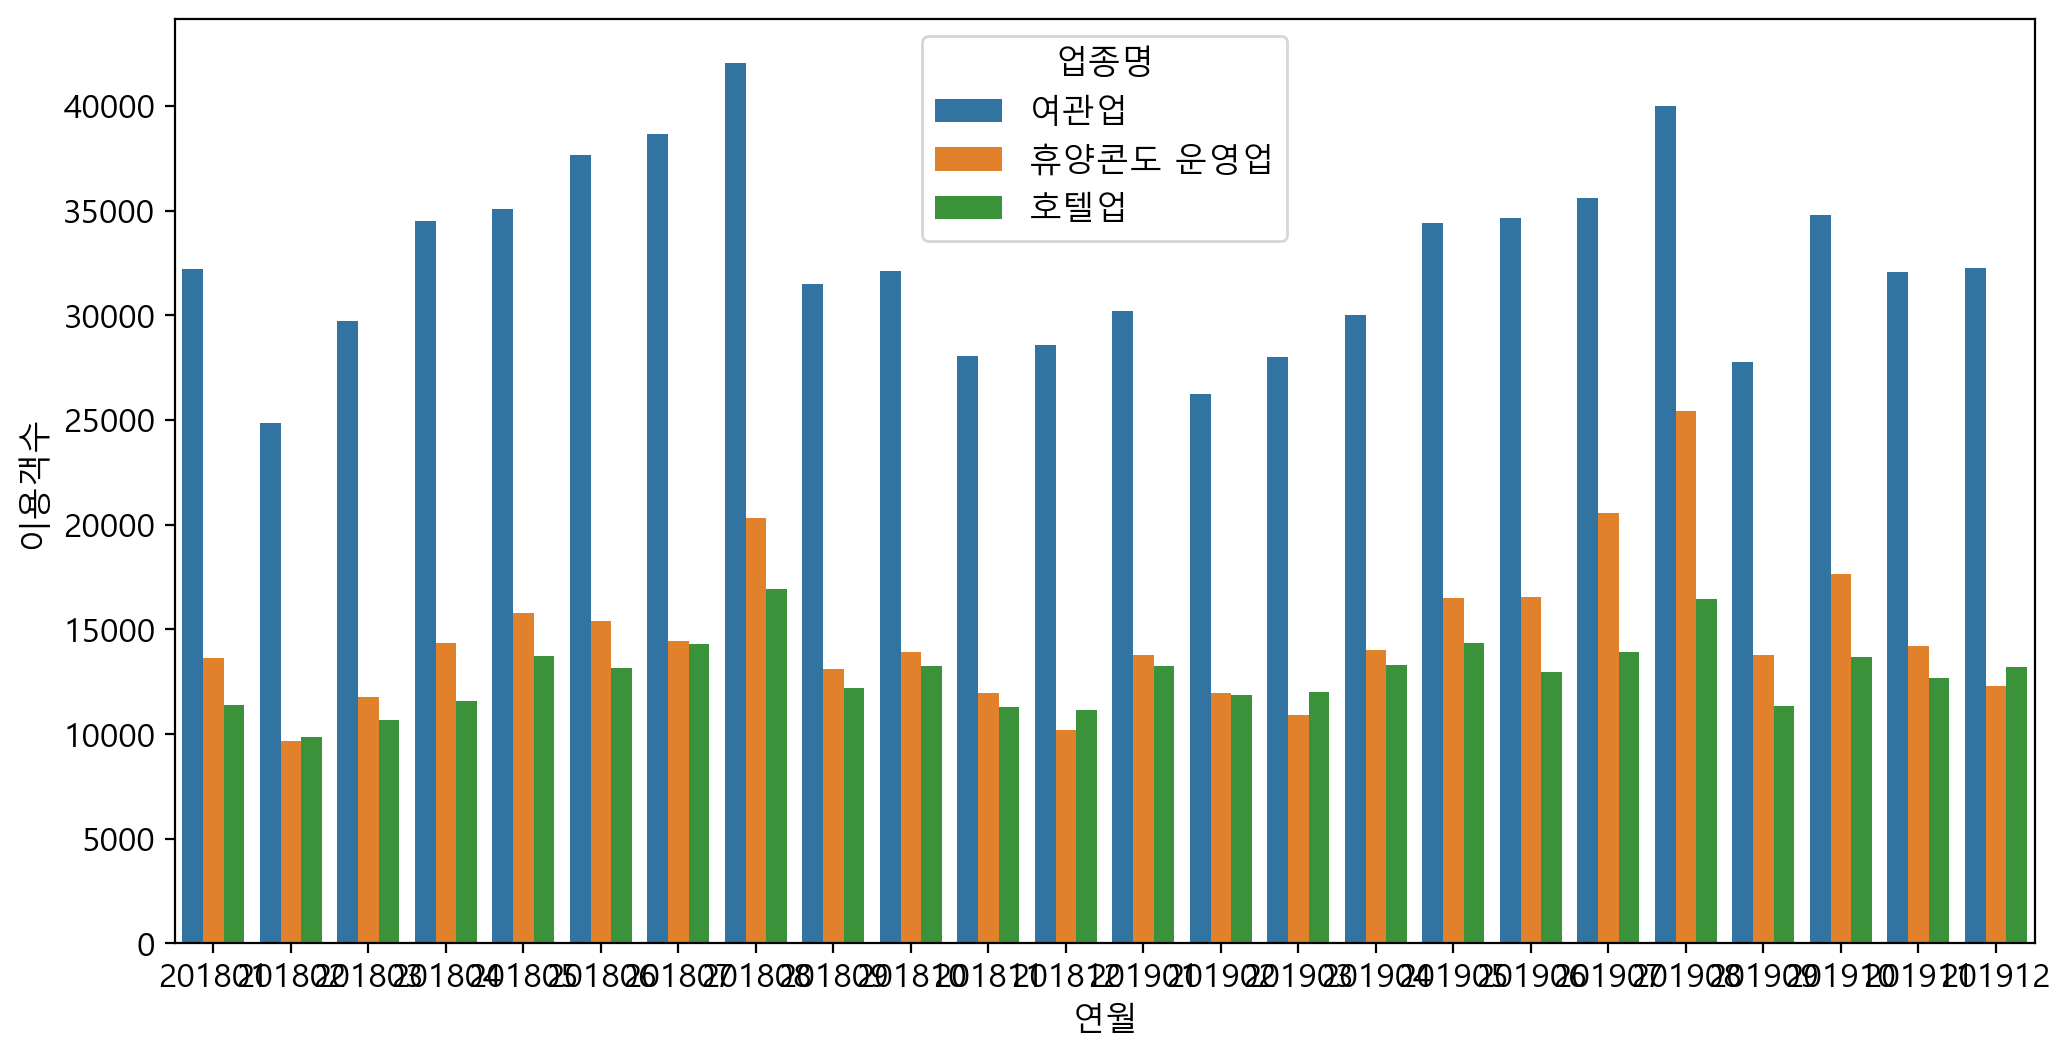

In [ ]:
plt.figure()
sns.barplot(data=mtmp, x='연월', y='이용객수', hue='업종명')
plt.show()
plt.close()

In [ ]:
1. 숙박 및 음식점업(55-56)
(2) 음식점업
'서양식 음식점업', 
'일식 음식점업', 
'피자, 햄버거, 샌드위치 및 유사 음식점업',
'기타 외국식 음식점업',
'한식 음식점업',
'중식 음식점업',

(3) 주점업
'비알콜 음료점업', 
'일반유흥 주점업',
'기타 주점업', 



In [ ]:
2. 예술, 스포츠 및 여가관련 서비스업
(1) 스포츠 및 오락관련 서비스업
'그외 기타 분류안된 오락관련 서비스업',
'기타 수상오락 서비스업', 
'그외 기타 스포츠시설 운영업', 
'골프장 운영업', 

(2) 유원지 및 기타 오락관련 서비스업
'기타 갬블링 및 베팅업',


2. 임대업(부동산 제외)
(1) 개인 및 가정용품 임대업
'스포츠 및 레크레이션 용품 임대업',





In [ ]:
(2) 운송장비 임대업
'자동차 임대업', 
 


In [ ]:
# 패키지?? 문화생활?? 전시관 드읃으

3. 사업 지원 서비스업
(1) 사업 지원 서비스업
'여행사업',
'전시 및 행사 대행업', 


In [ ]:

3. 소매업(47-)
(1) 대형 종합 소매업(대형마트)
'기타 대형 종합 소매업',

(2) 음식료품 위주 종합 소매업
'슈퍼마켓', 
'체인화 편의점',
'기타음식료품위주종합소매업',

(4) 그외 기타 종합 소매업
'그외 기타 종합 소매업',


In [ ]:
# 기념품????

3. 소매업(47-)
(3) 면세점
'면세점',

(6) 기타 상품 소매업
'화장품 및 방향제 소매업',
'관광 민예품 및 선물용품 소매업', 

In [ ]:
# 제주도에서 소비하는 식대. 고기 굽고~
3. 소매업(47-)
(5) 음,식료품 및 담배 소매업
'육류 소매업',
'건강 보조식품 소매업', 
'빵 및 과자류 소매업',  
'과실 및 채소 소매업',
'수산물 소매업', 


In [ ]:
# 관광지내 이동
3. 소매업(47-)

(7) 연료 소매업
'차량용 주유소 운영업',
'차량용 가스 충전업',


In [ ]:
# 제주도로 이동 혹은 제주도서 내 이동

4. 운송업
'택시 운송업'
'내항 여객 운송업'(배)
'정기 항공 운송업'(비행기), 

In [ ]:
5. 기타 개인 서비스 업
(1) 개인 서비스 업
'욕탕업', 
'마사지업', 

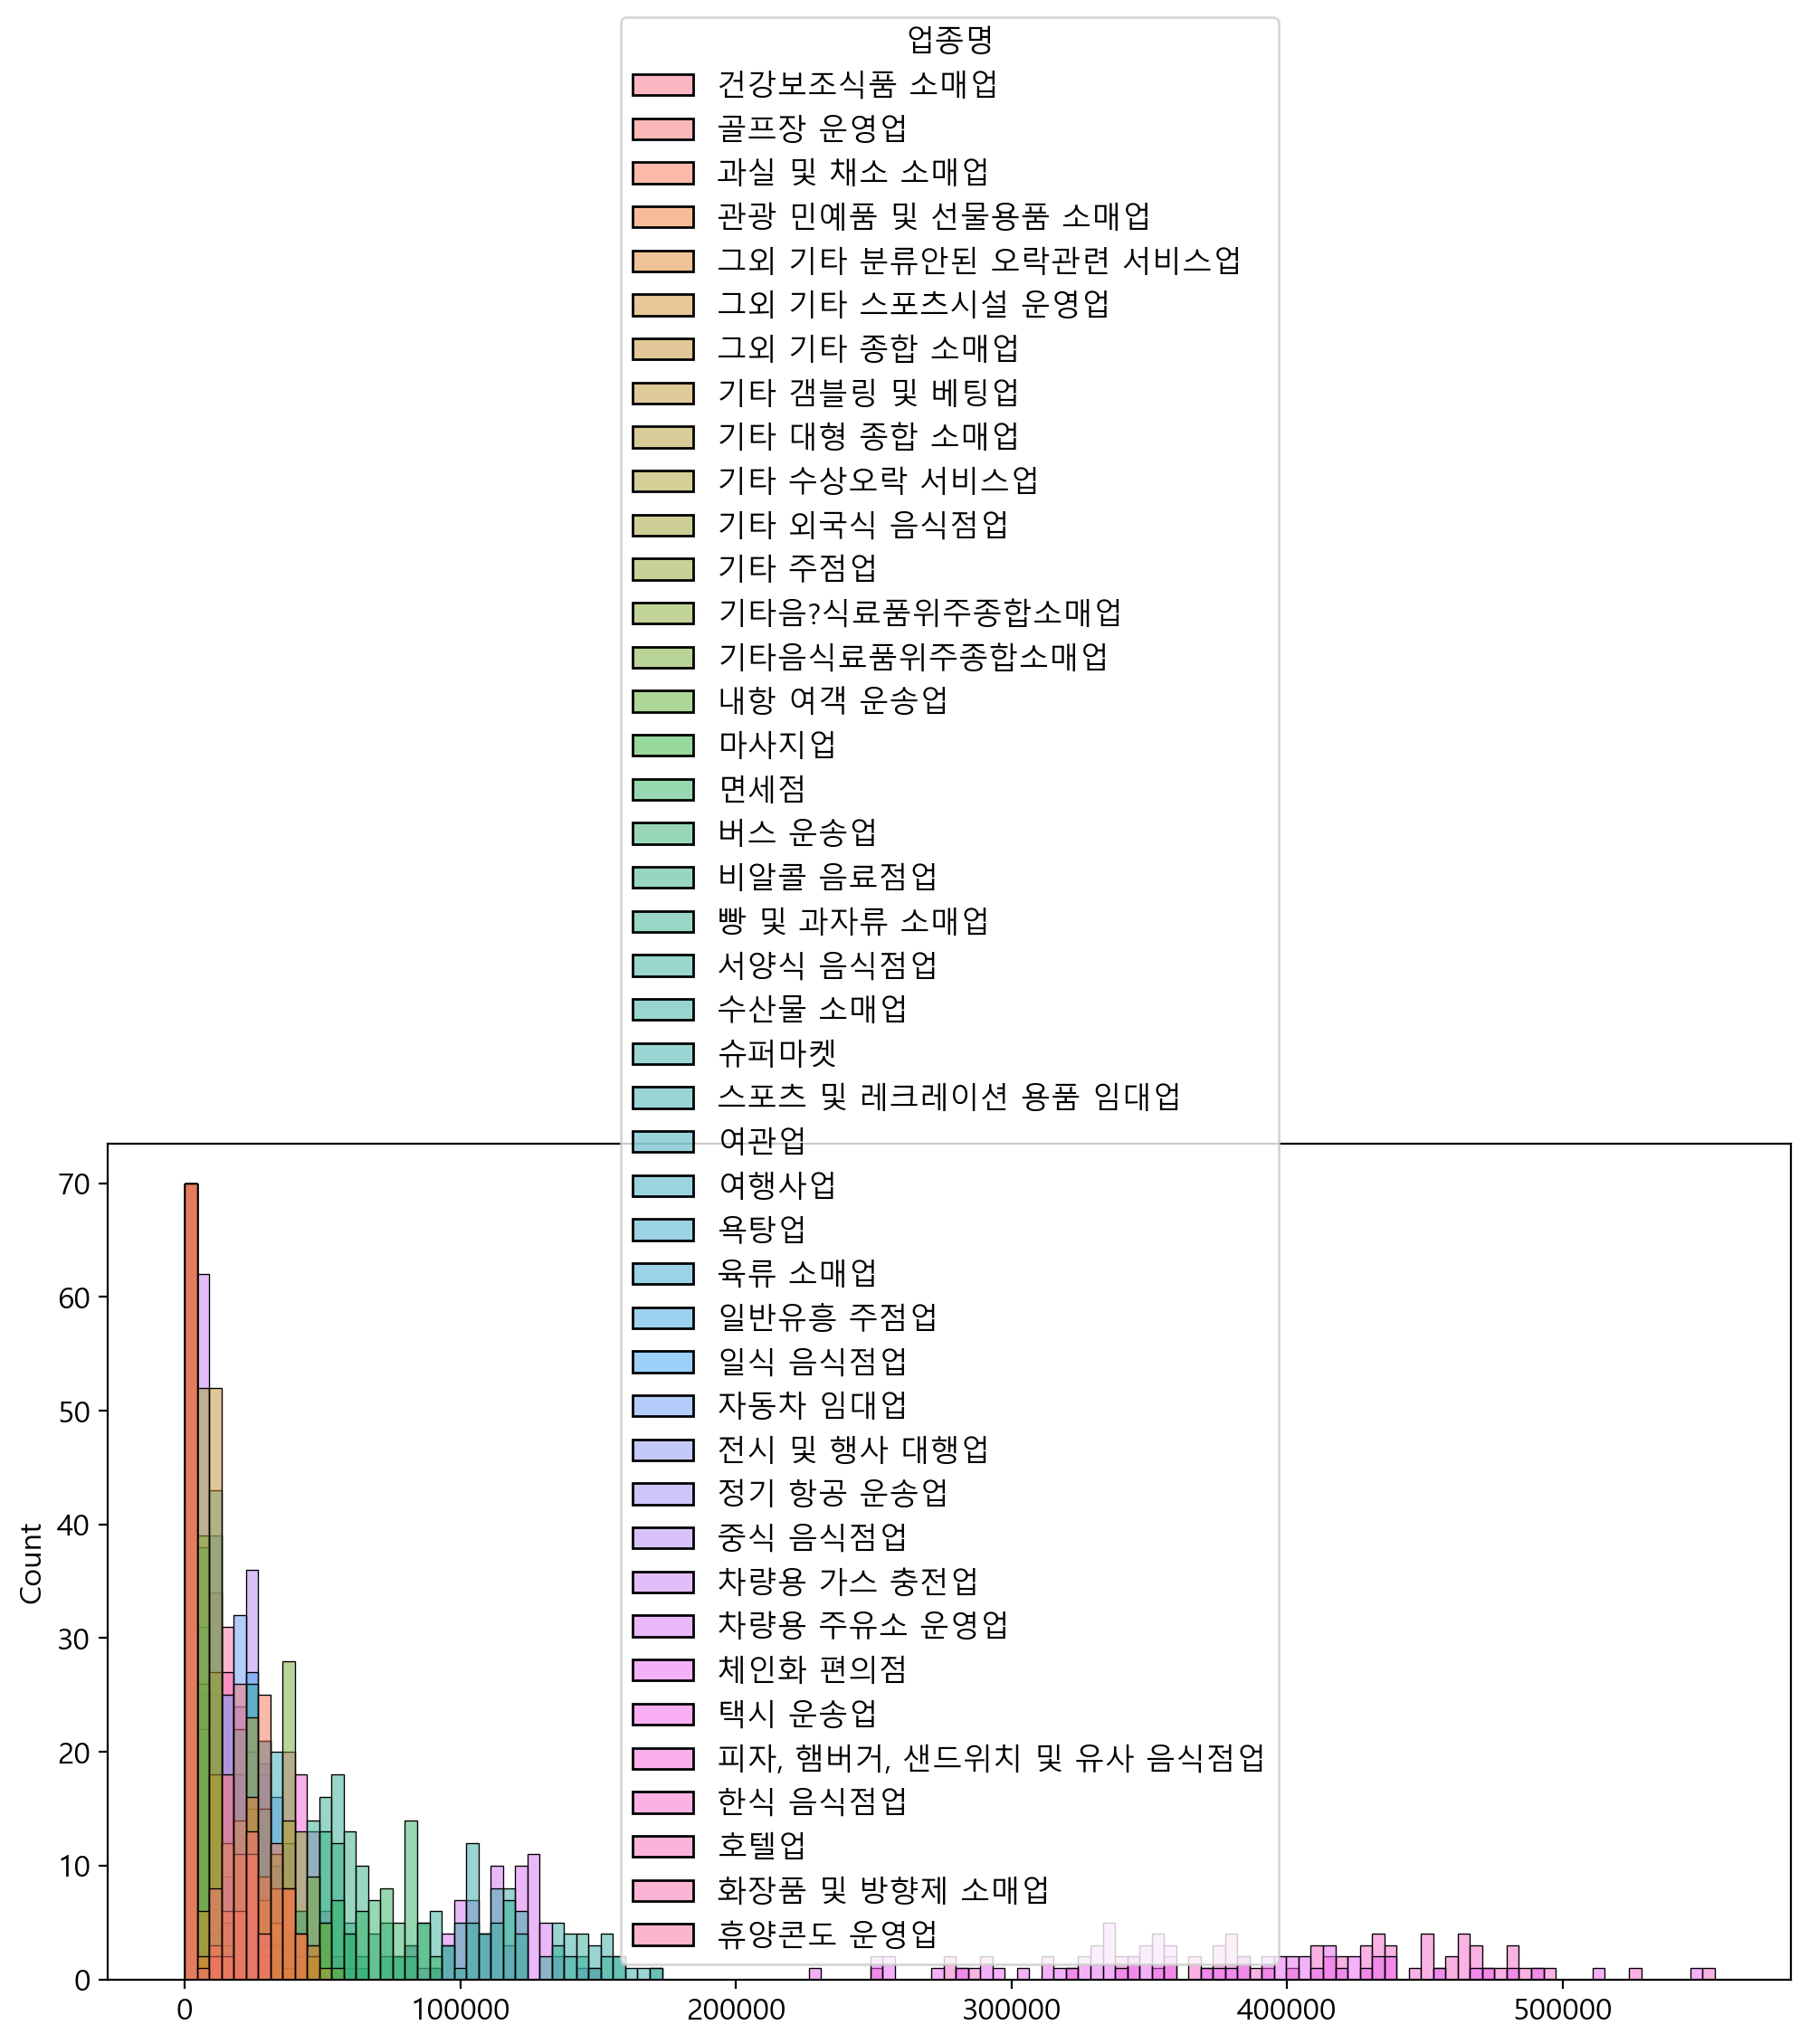

In [ ]:
plt.figure()
sns.histplot(data=pivot1)
plt.show()
plt.close()